In [2]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA =  'https://storage.dosm.gov.my/demography/death_maternal_state.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

              state       date  abs  rate
0             Johor 2000-01-01   13  19.4
1             Johor 2001-01-01    9  14.7
2             Johor 2002-01-01   12  20.1
3             Johor 2003-01-01   11  18.9
4             Johor 2004-01-01   14  24.4
..              ...        ...  ...   ...
353  W.P. Putrajaya 2018-01-01    0   0.0
354  W.P. Putrajaya 2019-01-01    0   0.0
355  W.P. Putrajaya 2020-01-01    0   0.0
356  W.P. Putrajaya 2021-01-01    1  47.5
357  W.P. Putrajaya 2022-01-01    1  54.4

[358 rows x 4 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   state   358 non-null    object        
 1   date    358 non-null    datetime64[ns]
 2   abs     358 non-null    int64         
 3   rate    358 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [4]:
# first 5
df.head
# last 5
df.tail

<bound method NDFrame.tail of               state       date  abs  rate
0             Johor 2000-01-01   13  19.4
1             Johor 2001-01-01    9  14.7
2             Johor 2002-01-01   12  20.1
3             Johor 2003-01-01   11  18.9
4             Johor 2004-01-01   14  24.4
..              ...        ...  ...   ...
353  W.P. Putrajaya 2018-01-01    0   0.0
354  W.P. Putrajaya 2019-01-01    0   0.0
355  W.P. Putrajaya 2020-01-01    0   0.0
356  W.P. Putrajaya 2021-01-01    1  47.5
357  W.P. Putrajaya 2022-01-01    1  54.4

[358 rows x 4 columns]>

In [5]:
df.describe()

,date,abs,rate
count,358,358.000000,358.000000
mean,2011-03-08 10:43:34.525139712,8.737430,27.847486
min,2000-01-01 00:00:00,0.000000,0.000000
25%,2005-04-02 06:00:00,3.000000,17.700000
50%,2011-01-01 00:00:00,7.000000,24.400000
75%,2017-01-01 00:00:00,12.000000,34.250000
max,2022-01-01 00:00:00,80.000000,328.500000
std,NaN,7.987967,24.646369


In [7]:
# rate more than 50
df[df["rate"]>50]

,state,date,abs,rate
7,Johor,2007-01-01,29,50.2
21,Johor,2021-01-01,32,64.0
44,Kedah,2021-01-01,27,81.7
67,Kelantan,2021-01-01,26,74.8
71,Melaka,2002-01-01,9,65.2
90,Melaka,2021-01-01,10,75.8
111,Pahang,2019-01-01,9,51.5
113,Pahang,2021-01-01,14,83.4
116,Negeri Sembilan,2001-01-01,21,76.1
117,Negeri Sembilan,2002-01-01,19,70.9


In [8]:
df.corr(numeric_only = True)

,abs,rate
abs,1.00000,0.32615
rate,0.32615,1.00000


In [9]:
df.cov(numeric_only=True)

,abs,rate
abs,63.807615,64.210543
rate,64.210543,607.443509


In [14]:
df[df['rate'].isna()]

,state,date,abs,rate


In [15]:
df[df['abs'].isna()]

,state,date,abs,rate


In [19]:
grp_state = df.groupby('state')

state_list = []

for grp, grp_info in grp_state:
    state_dict = {}

    state_dict['State'] = grp
    state_dict['Cases'] = grp_info.date.count()
    # state_dict['Abs'] = grp_info.abs
    state_dict['Rate'] = grp_info.rate.sum()

    state_list.append(state_dict)

state_df = pd.DataFrame(state_list)
state_df

,State,Cases,Rate
0,Johor,23,601.9
1,Kedah,23,674.2
2,Kelantan,23,740.0
3,Melaka,23,609.3
4,Negeri Sembilan,23,761.6
5,Pahang,23,699.9
6,Perak,23,629.4
7,Perlis,23,535.9
8,Pulau Pinang,23,644.7
9,Sabah,23,809.2


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

state_df.State.unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

<Axes: >

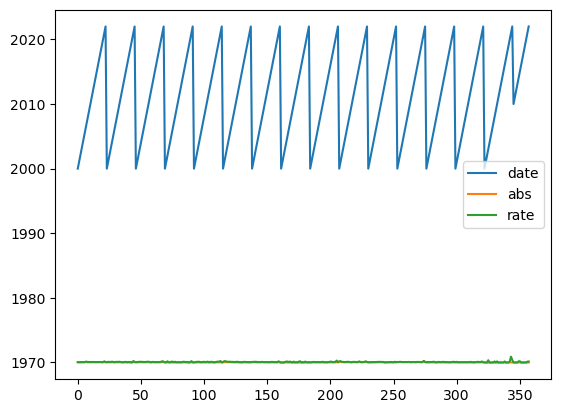

In [23]:
df.plot()

<Axes: >

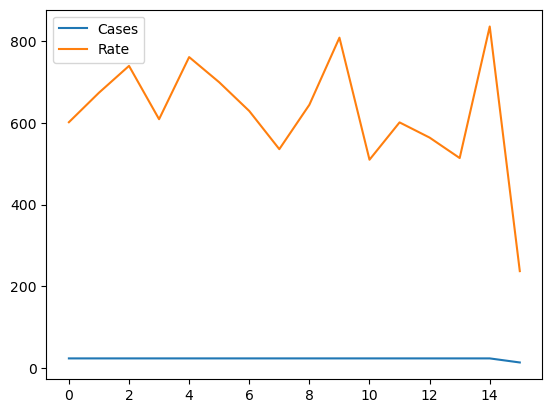

In [24]:
state_df.plot()

<Axes: >

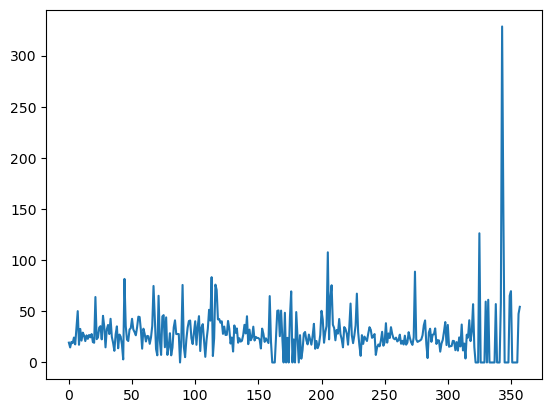

In [27]:
df.rate.plot()

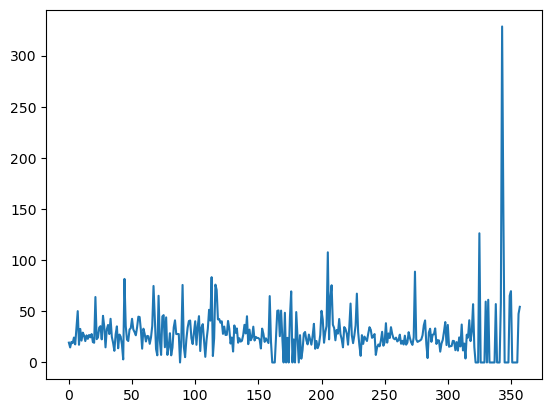

In [29]:
df.rate.plot()
plt.show()

<Axes: >

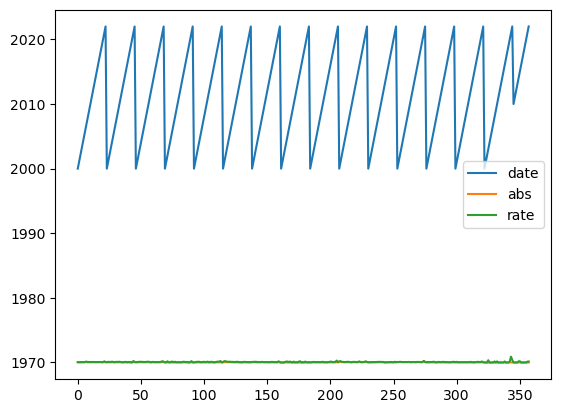

In [30]:
df.plot.line()

<Axes: >

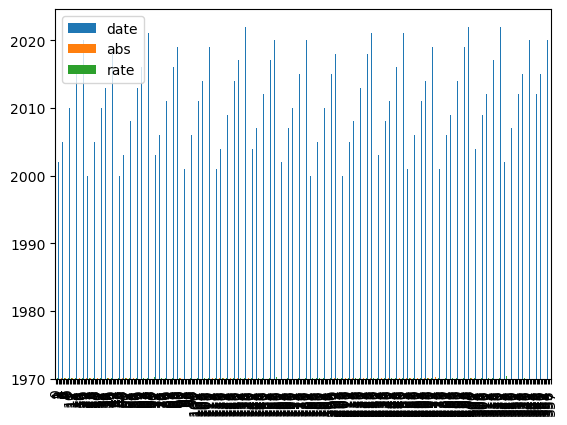

In [31]:
df.plot.bar()

<Axes: >

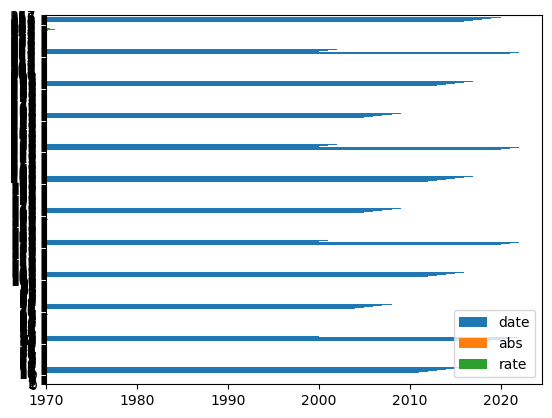

In [32]:
df.plot.barh()
# change x because unreadable

<Axes: ylabel='Frequency'>

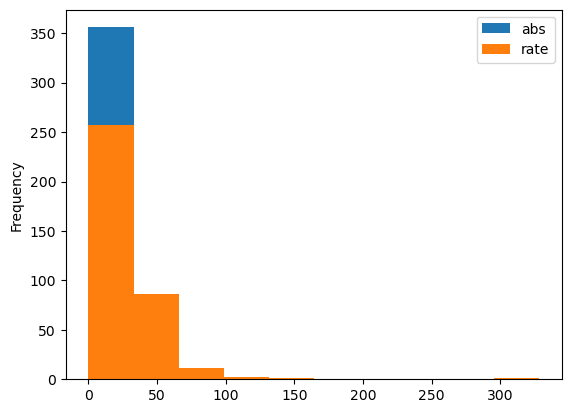

In [33]:
df.plot.hist()

<Axes: >

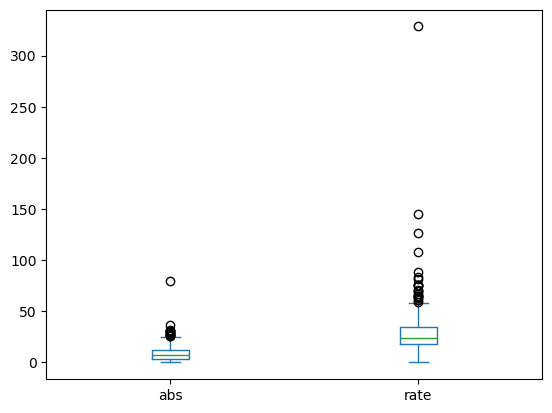

In [34]:
df.plot.box()

<Axes: ylabel='rate'>

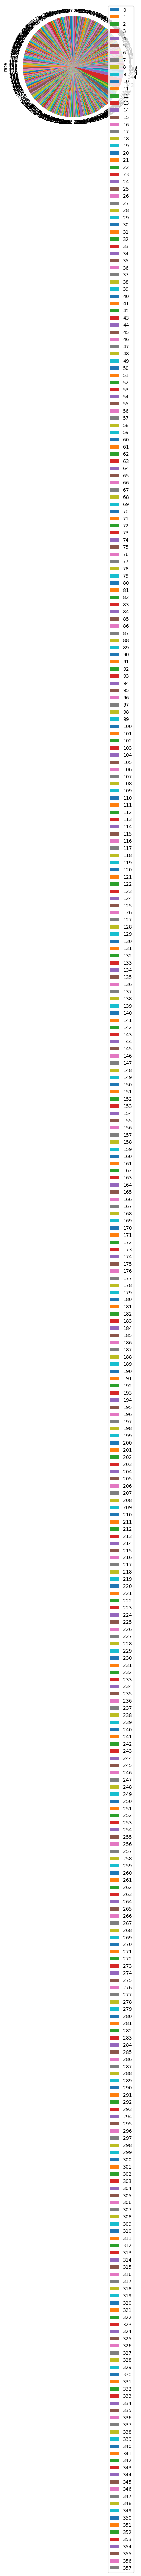

In [38]:
df.plot.pie(x = "state", y = "rate")

<Axes: xlabel='state', ylabel='rate'>

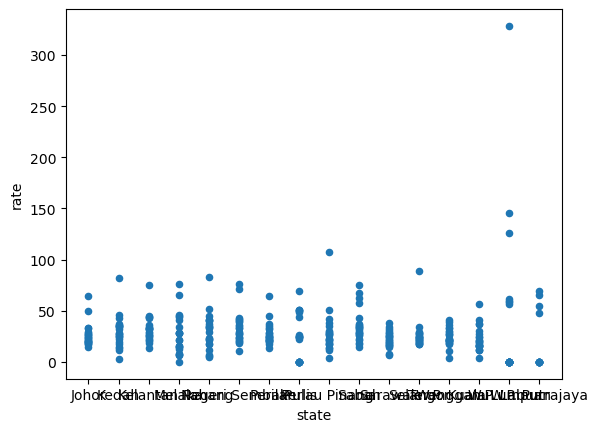

In [39]:
df.plot.scatter(x = "state", y = "rate")

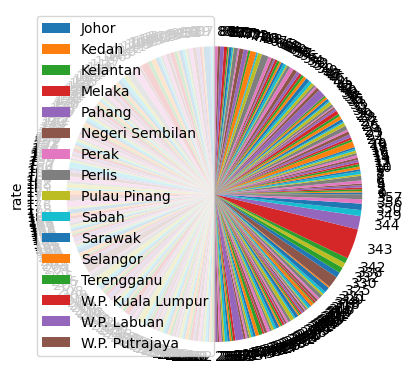

In [41]:
df.plot.pie(x = "state", y = "rate")

labels = df.state.unique()
plt.legend(labels)

In [ ]:
# groupo pie chart to looks good

can sum using year also.